In [31]:
"""
QUESTION 1
"""
print("----------- QUESTION 1 -----------")
# -*- coding: utf-8 -*-
import numpy as np
import random
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
np.random.seed(42)
random.seed(42)

# load data
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# define stop_words and vectorizer
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = text.CountVectorizer(min_df=3, stop_words=stop_words)

# get the TF matrix
X_counts = vectorizer.fit_transform(dataset.data)
X_counts.toarray()

# TF-IDF matrix
X_tfidf = text.TfidfTransformer().fit_transform(X_counts)
print ("The dimension of the TF-IDF matrix is ", X_tfidf.shape)

----------- QUESTION 1 -----------
The dimension of the TF-IDF matrix is  (7882, 27768)


----------- QUESTION 2 -----------
the contingency table is 
 [[  667  3072]
 [ 4002 11105]]
contingency table


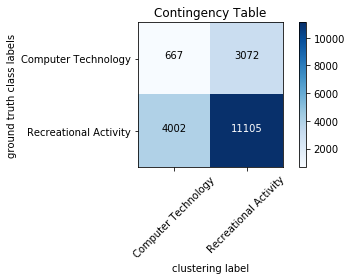

In [26]:
"""
QUESTION 2
"""
print("----------- QUESTION 2 -----------")

# Plot the contingency table
def plot_contingency_table(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized contingency table")
    else:
        print('contingency table')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Contingency Table")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('ground truth class labels')
    plt.xlabel('clustering label')
    plt.tight_layout()

# assign labels to data
num_data = len(dataset.target)
y = [0 if dataset.target[i] < 4 else 1 for i in range(num_data)]

# train a KMeans classifier
kmeans_clf = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0)

# use k-means to predict the label for each data
y_pred = kmeans_clf.fit_predict(X_tfidf)

# report contingency table
print("the contingency table is \n", metrics.cluster.contingency_matrix(y,y_pred))

# plot the contingency table
classes = ["Computer Technology","Recreational Activity"]
plt.figure()
plot_contingency_table(metrics.cluster.contingency_matrix(y,y_pred), classes, normalize=False)
plt.show()

In [3]:
"""
QUESTION 3
"""
print("----------- QUESTION 3 -----------")

# evaluate clustering scores
print("Homogeneity: ",metrics.homogeneity_score(y,y_pred))
print("Completeness: ",metrics.completeness_score(y,y_pred))
print("V-measure: ",metrics.v_measure_score(y,y_pred))
print("adjusted Rand Index: ",metrics.adjusted_rand_score(y,y_pred))
print("adjusted mutual information score: ",metrics.adjusted_mutual_info_score(y,y_pred))

----------- QUESTION 3 -----------
Homogeneity:  0.2535958928926043
Completeness:  0.334815748824373
V-measure:  0.28860033608397917
adjusted Rand Index:  0.18076179588914554
adjusted mutual information score:  0.25352755133060884


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


----------- QUESTION 4 -----------


No handles with labels found to put in legend.


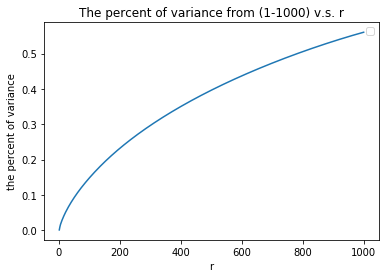

In [4]:
"""
QUESTION 4
"""
print("----------- QUESTION 4 -----------")

svd = TruncatedSVD(n_components = 1000, random_state = 42)
X_SVD_1000 = svd.fit_transform(X_tfidf)
var = svd.explained_variance_ratio_

r = range(1,1001)
top_r_var = []

for i in r :
    top_r_var.append(var[0:i].sum())
    
# Plot adjusted mutual info
plt.plot(r, top_r_var)
plt.xlabel('r')
plt.ylabel('the percent of variance')
plt.title('The percent of variance from (1-1000) v.s. r')
plt.legend() 
plt.show() 


----------- QUESTION 5 -----------


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use a

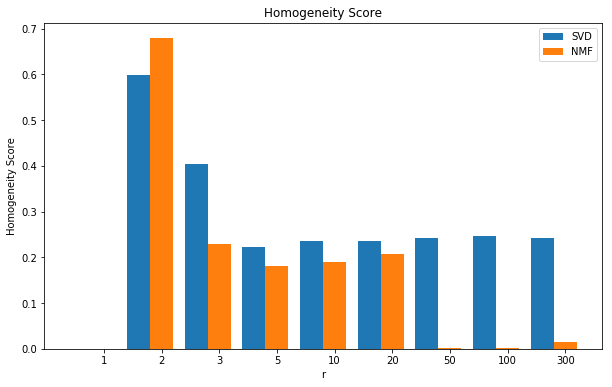

The best r for homogeneity score of SVD is 2
The best r for homogeneity score of NMF is 2


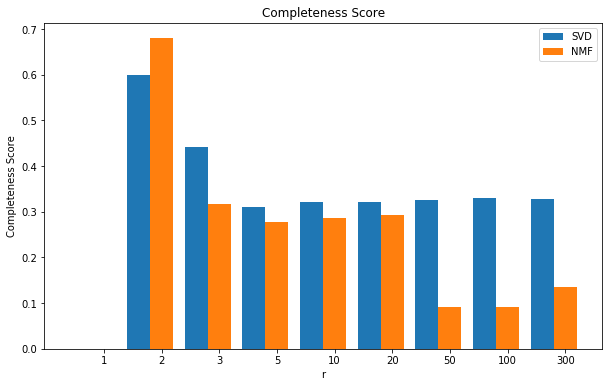

The best r for completeness score of SVD is 2
The best r for completeness score of NMF is 2


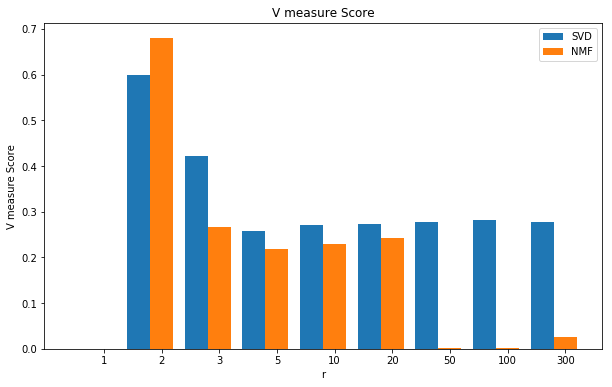

The best r for V measure score of SVD is 2
The best r for V measure score of NMF is 2


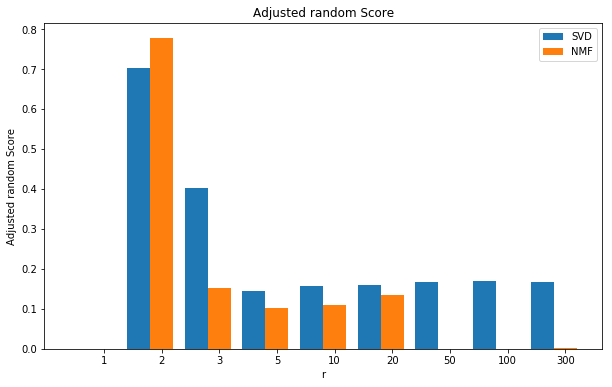

The best r for adjusted random score of SVD is 2
The best r for adjusted random score of NMF is 2


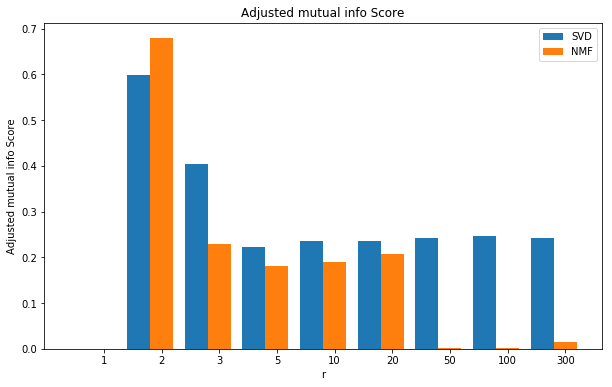

The best r for adjusted mutual info score of SVD is 2
The best r for adjusted mutual info score of NMF is 2


In [7]:
"""
QUESTION 5
"""
print("----------- QUESTION 5 -----------")

r = [1, 2, 3, 5, 10, 20, 50, 100, 300]

homogeneity_SVD = []
homogeneity_NMF = []
completeness_SVD = []
completeness_NMF = []
vmeasure_SVD = []
vmeasure_NMF = []
adjusted_rand_SVD = []
adjusted_rand_NMF = []
adjusted_mutual_SVD = []
adjusted_mutual_NMF = []

for i in r :
    svd =  TruncatedSVD(n_components=i, random_state=42)
    X_SVD = svd.fit_transform(X_tfidf)
    y_pred_SVD = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_SVD)
    nmf = NMF(n_components=i, random_state=42)
    X_NMF = nmf.fit_transform(X_tfidf)
    y_pred_NMF = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_NMF)
    homogeneity_SVD.append(metrics.homogeneity_score(y,y_pred_SVD))
    homogeneity_NMF.append(metrics.homogeneity_score(y,y_pred_NMF))
    completeness_SVD.append(metrics.completeness_score(y,y_pred_SVD))
    completeness_NMF.append(metrics.completeness_score(y,y_pred_NMF))
    vmeasure_SVD.append(metrics.v_measure_score(y,y_pred_SVD))
    vmeasure_NMF.append(metrics.v_measure_score(y,y_pred_NMF))
    adjusted_rand_SVD.append(metrics.adjusted_rand_score(y,y_pred_SVD))
    adjusted_rand_NMF.append(metrics.adjusted_rand_score(y,y_pred_NMF))
    adjusted_mutual_SVD.append(metrics.adjusted_mutual_info_score(y,y_pred_SVD))
    adjusted_mutual_NMF.append(metrics.adjusted_mutual_info_score(y,y_pred_NMF))
 

# Just for ploting 
x1 = [1, 2, 3, 4, 5, 6, 7, 8 ,9]
x2 = [1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4, 9.4]

# Plot homogeneity score
plt.figure(figsize=(10,6))
plt.bar(x1,homogeneity_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2,homogeneity_NMF,width =0.4,label='NMF',tick_label = r)
plt.xlabel('r')
plt.ylabel('Homogeneity Score')
plt.title('Homogeneity Score')
plt.legend() 
plt.show() 

print("The best r for homogeneity score of SVD is", homogeneity_SVD.index(max(homogeneity_SVD))+1)
print("The best r for homogeneity score of NMF is", homogeneity_NMF.index(max(homogeneity_NMF))+1)

# Plot completeness score
plt.figure(figsize=(10,6))
plt.bar(x1,completeness_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2,completeness_NMF,width =0.4,label='NMF',tick_label = r)
plt.xlabel('r')
plt.ylabel('Completeness Score')
plt.title('Completeness Score')
plt.legend() 
plt.show() 

print("The best r for completeness score of SVD is", completeness_SVD.index(max(completeness_SVD))+1)
print("The best r for completeness score of NMF is", completeness_NMF.index(max(completeness_NMF))+1)

# Plot V measure score
plt.figure(figsize=(10,6))
plt.bar(x1, vmeasure_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2, vmeasure_NMF,width =0.4,label='NMF',tick_label = r)
plt.xlabel('r')
plt.ylabel('V measure Score')
plt.title('V measure Score')
plt.legend() 
plt.show() 

print("The best r for V measure score of SVD is", vmeasure_SVD.index(max(vmeasure_SVD))+1)
print("The best r for V measure score of NMF is", vmeasure_NMF.index(max(vmeasure_NMF))+1)

# Plot adjusted random score score
plt.figure(figsize=(10,6))
plt.bar(x1,adjusted_rand_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2,adjusted_rand_NMF,width =0.4,label='NMF',tick_label = r)
plt.xlabel('r')
plt.ylabel('Adjusted random Score')
plt.title('Adjusted random Score')
plt.legend() 
plt.show() 

print("The best r for adjusted random score of SVD is", adjusted_rand_SVD.index(max(adjusted_rand_SVD))+1)
print("The best r for adjusted random score of NMF is", adjusted_rand_NMF.index(max(adjusted_rand_NMF))+1)

# Plot adjusted mutual info
plt.figure(figsize=(10,6))
plt.bar(x1,adjusted_mutual_SVD,width =0.4,label='SVD',tick_label = r)
plt.bar(x2,adjusted_mutual_NMF,width =0.4,label='NMF', tick_label = r)
plt.xlabel('r')
plt.ylabel('Adjusted mutual info Score')
plt.title('Adjusted mutual info Score')
plt.legend() 
plt.show() 

print("The best r for adjusted mutual info score of SVD is", adjusted_mutual_SVD.index(max(adjusted_mutual_SVD))+1)
print("The best r for adjusted mutual info score of NMF is", adjusted_mutual_NMF.index(max(adjusted_mutual_NMF))+1)

In [8]:
"""
QUESTION 6
"""
print("When r is small, as we saw in the variance graph, we only keep a small amount of information from the original data so we get a bad clustering.")
print("When r is big, we are in a high dimensional space and in this space, the Euclidean distance is not good for clustering anymore (K-means is based on the Euclidean distance)")

When r is small, as we saw in the variance graph, we only keep a small amount of information from the original data so we get a bad clustering.
When r is big, we are in a high dimensional space and in this space, the Euclidean distance is not good for clustering anymore (K-means is based on the Euclidean distance)


----------- QUESTION 7 -----------


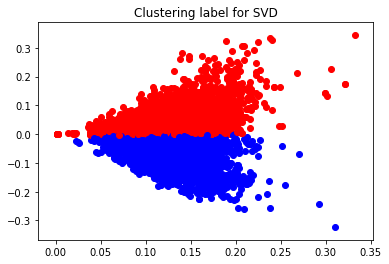

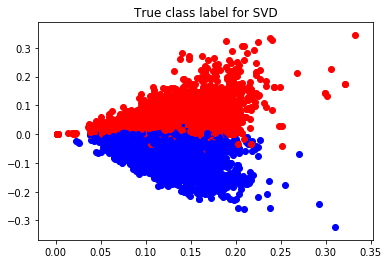

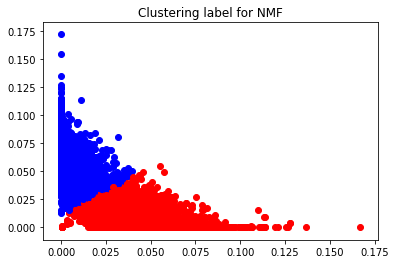

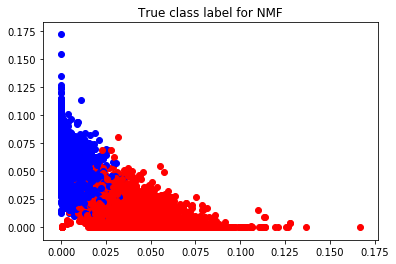

In [9]:
"""
QUESTION 7
"""
print("----------- QUESTION 7 -----------")

best_k_svd = 2
svd =  TruncatedSVD(n_components=best_k_svd, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
y_pred_svd = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd)

best_k_nmf = 2
nmf =  NMF(n_components=best_k_nmf, random_state=42)
X_nmf = nmf.fit_transform(X_tfidf)
y_pred_nmf = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf)

def plot_cluster_or_class(X,y):  # X is a n-by-k matrix,but when we project it to a 2-D plane we only use the first two columns.
    for i in range(X.shape[0]):
        if y[i]==0:
            plt.scatter(X[i,0],X[i,1],c='r')
        elif y[i]==1:
            plt.scatter(X[i,0],X[i,1],c='b')

#SVD
plot_cluster_or_class(X_svd,y_pred_svd)
plt.title('Clustering label for SVD')
plt.show()

plot_cluster_or_class(X_svd,y)
plt.title('True class label for SVD')
plt.show()

#NMF
plot_cluster_or_class(X_nmf,y_pred_nmf)
plt.title('Clustering label for NMF')
plt.show()

plot_cluster_or_class(X_nmf,y)
plt.title('True class label for NMF')
plt.show()

----------- QUESTION 8 -----------
[ 3.58123672 -0.01002519]
[1. 1.]


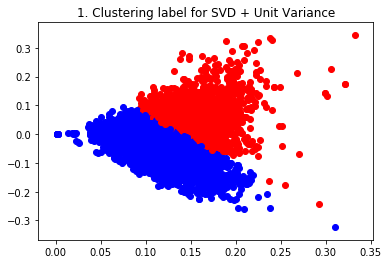

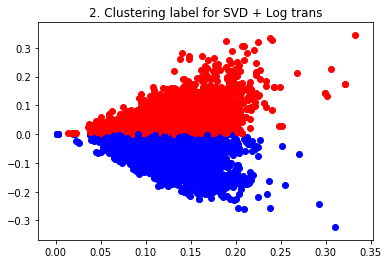

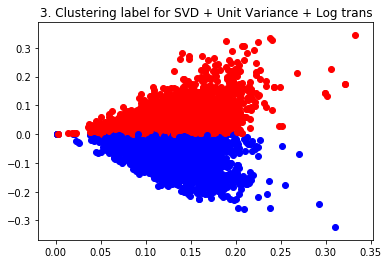

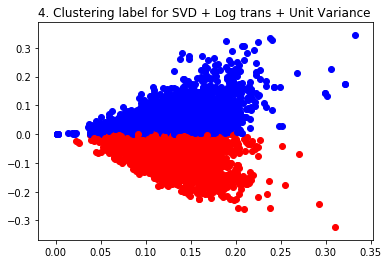

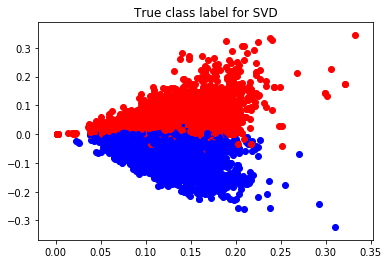

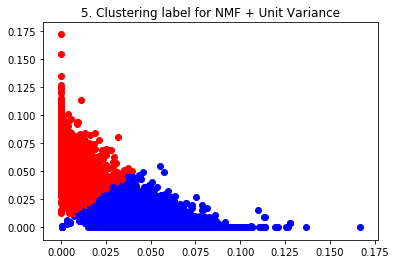

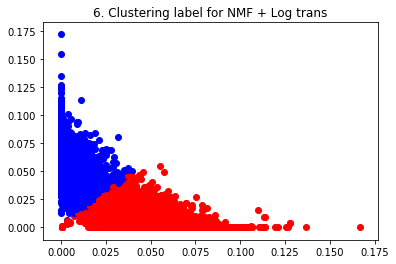

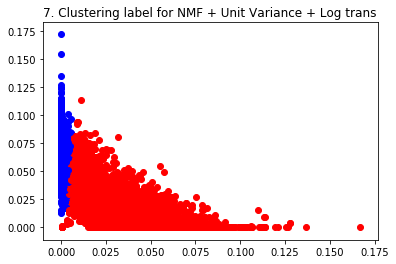

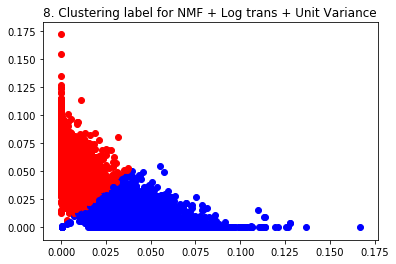

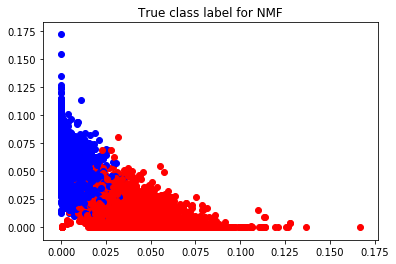

In [10]:
"""
QUESTION 8
"""
print("----------- QUESTION 8 -----------")

# Do the transformation
def log_trans(dataMatrix) :
    c = 0.01
    finalMatrix = np.zeros(shape=(dataMatrix.shape[0],dataMatrix.shape[1]))
    for i in range(0, finalMatrix.shape[0]) :
        for j in range(0, finalMatrix.shape[1]) : 
            finalMatrix[i,j] = np.log10(abs(dataMatrix[i,j])+c)-np.log10(c) if dataMatrix[i,j] > 0 \
                                else -np.log10(abs(dataMatrix[i,j])+c)+np.log10(c) if dataMatrix[i,j] < 0 else 0
    return finalMatrix
    
from sklearn import preprocessing

# For each feature, let them have unit variance and zero means
X_svd_scaled = preprocessing.StandardScaler(with_mean=False).fit_transform(X_svd)
X_nmf_scaled = preprocessing.scale(X_nmf)

# Checking the mean and std for the scaled data
print(X_svd_scaled.mean(axis=0))
print(X_svd_scaled.std(axis=0))

# Combination 1: SVD + Unit Variance
y_pred_svd_1 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd_scaled)
plot_cluster_or_class(X_svd,y_pred_svd_1)
plt.title('1. Clustering label for SVD + Unit Variance')
plt.show()
# Combination 2: SVD + Log Trans
y_pred_svd_2 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_svd))
plot_cluster_or_class(X_svd,y_pred_svd_2)
plt.title('2. Clustering label for SVD + Log trans')
plt.show()
# Combination 3: SVD + Unit Variance + Log Trans
y_pred_svd_3 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_svd_scaled))
plot_cluster_or_class(X_svd,y_pred_svd_3)
plt.title('3. Clustering label for SVD + Unit Variance + Log trans')
plt.show()
# Combination 4: SVD + Log Trans + Unit Variance
y_pred_svd_4 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(preprocessing.StandardScaler(with_mean=False).fit_transform(log_trans(X_svd)))
plot_cluster_or_class(X_svd,y_pred_svd_4)
plt.title('4. Clustering label for SVD + Log trans + Unit Variance ')
plt.show()
# True Class for SVD
plot_cluster_or_class(X_svd,y)
plt.title('True class label for SVD')
plt.show()
# Combination 5:  NMF + Unit Variance
y_pred_nmf_1 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf_scaled)
plot_cluster_or_class(X_nmf,y_pred_nmf_1)
plt.title('5. Clustering label for NMF + Unit Variance')
plt.show()
# Combination 6: NMF + Log Trans
y_pred_nmf_2 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_nmf))
plot_cluster_or_class(X_nmf,y_pred_nmf_2)
plt.title('6. Clustering label for NMF + Log trans')
plt.show()
# Combination 7: NMF + Unit Variance + Log Trans
y_pred_nmf_3 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_nmf_scaled))
plot_cluster_or_class(X_nmf,y_pred_nmf_3)
plt.title('7. Clustering label for NMF + Unit Variance + Log trans')
plt.show()
# Combination 8: NMF + Log Trans + Unit Variance
y_pred_nmf_4 = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0).fit_predict(preprocessing.scale(log_trans(X_nmf)))
plot_cluster_or_class(X_nmf,y_pred_nmf_4)
plt.title('8. Clustering label for NMF + Log trans + Unit Variance')
plt.show()
# True class for NMF
plot_cluster_or_class(X_nmf,y)
plt.title('True class label for NMF')
plt.show()



In [11]:
"""
QUESTION 9
"""
print("----------- QUESTION 9 -----------")
print("Q: Why logarithm transformation may improve the clustering results")
print("A: Becuase logarithm increase monotonically, it will not change the property of the original data. At the same time, it will make the data become more smoothy. The differences between small value data points will be upscaled and the differences between big value data points will be downscaled.")


----------- QUESTION 9 -----------
Q: Why logarithm transformation may improve the clustering results
A: Becuase logarithm increase monotonically, it will not change the property of the original data. At the same time, it will make the data become more smoothy. The differences between small value data points will be upscaled and the differences between big value data points will be downscaled.


In [12]:
"""
QUESTION 10
"""
print("----------- QUESTION 10 -----------")# evaluate clustering scores

def print_score(y, y_pred) :
    print("Homogeneity: ",metrics.homogeneity_score(y,y_pred))
    print("Completeness: ",metrics.completeness_score(y,y_pred))
    print("V-measure: ",metrics.v_measure_score(y,y_pred))
    print("adjusted Rand Index: ",metrics.adjusted_rand_score(y,y_pred))
    print("adjusted mutual information score: ",metrics.adjusted_mutual_info_score(y,y_pred))

print("Combination 1: SVD + Unit Variance")
print_score(y, y_pred_svd_1)
print("Combination 2: SVD + Log Trans")
print_score(y, y_pred_svd_2)
print("Combination 3: SVD + Unit Variance + Log Trans")
print_score(y, y_pred_svd_3)
print("Combination 4: SVD + Log Trans + Unit Variance")
print_score(y, y_pred_svd_4)
print("Original SVD")
print_score(y, y_pred_svd)
print("Combination 5:  NMF + Unit Variance")
print_score(y, y_pred_nmf_1)
print("Combination 6: NMF + Log Trans")
print_score(y, y_pred_nmf_2)
print("Combination 7: NMF + Unit Variance + Log Trans")
print_score(y, y_pred_nmf_3)
print("Combination 8: NMF + Log Trans + Unit Variance ")
print_score(y, y_pred_nmf_4)
print("Original NMF")
print_score(y, y_pred_nmf)

----------- QUESTION 10 -----------
Combination 1: SVD + Unit Variance
Homogeneity:  0.23487337816681297
Completeness:  0.26292238709277604
V-measure:  0.24810765202054205
adjusted Rand Index:  0.2548815728836908
adjusted mutual information score:  0.23480332761170244
Combination 2: SVD + Log Trans
Homogeneity:  0.602137798588618
Completeness:  0.6021122086924553
V-measure:  0.6021250033686485
adjusted Rand Index:  0.7096443565178631
adjusted mutual information score:  0.6020757835023501
Combination 3: SVD + Unit Variance + Log Trans
Homogeneity:  0.6035745974153113
Completeness:  0.6035369208670077
V-measure:  0.6035557585531763
adjusted Rand Index:  0.7109276549101925
adjusted mutual information score:  0.6035006268276424
Combination 4: SVD + Log Trans + Unit Variance
Homogeneity:  0.605540970722013
Completeness:  0.6055013716065781
V-measure:  0.6055211705168821
adjusted Rand Index:  0.7126405227745793
adjusted mutual information score:  0.6054652575093921
Original SVD
Homogeneity: 

C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


----------- QUESTION 11 -----------
The dimension of the TF-IDF matrix is  (18846, 52295)
the contingency table is 
 [[ 57  40   0   1   5  84   0   0  83   1   0   0   2 401  36   9   0  80
    0   0]
 [ 82   0   1  16   1   1   2   0 241   0   0   4   1   3 525   0   0   0
    0  96]
 [ 33   0  18   2   0   0  11   0 126   0   2   2   0   0 206   0   0   0
    0 585]
 [ 25   0 230   7   1   0   5   0 175   0   0   5   0   0 437   0   3   0
    0  94]
 [ 25   0 103  10   0   0   1   0 372   0   0   3   0   1 437   0   0   0
    0  11]
 [ 86   0   1  25   0   0   2   0 143   3   0   4   0   1 569   0   0   0
    0 154]
 [  5   0  70   3  27   0   7   0 477   0   0  12   5   0 334   0  12   0
    0  23]
 [ 18   0   0   7 568   0   1   0 210   0   0   5   3   0 164  12   0   0
    0   2]
 [ 77   0   0  17 682   0   1   0 110   0   0  12   0   0  97   0   0   0
    0   0]
 [  2   0   0   2   0   0   1   0 312   0   0   2   4   1 171   0 499   0
    0   0]
 [  2   0   0   3   2   0   0   0

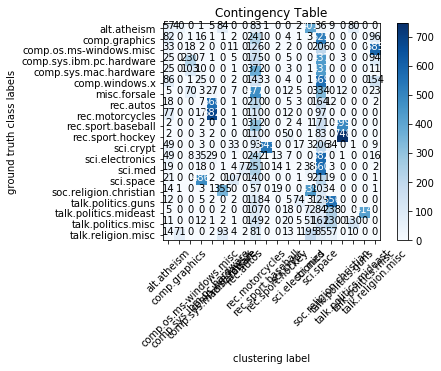

Homogeneity:  0.35942082651801804
Completeness:  0.45111242050273204
V-measure:  0.4000803165708632
adjusted Rand Index:  0.13663613501490818
adjusted mutual information score:  0.35731878968094594


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [28]:
"""
QUESTION 11
"""
print("----------- QUESTION 11 -----------")

dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# define stop_words and vectorizer
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = text.CountVectorizer(min_df=3, stop_words=stop_words)

# get the TF matrix
X_counts = vectorizer.fit_transform(dataset.data)
X_counts.toarray()

# TF-IDF matrix
X_tfidf = text.TfidfTransformer().fit_transform(X_counts)
print ("The dimension of the TF-IDF matrix is ",X_tfidf.shape)

##################
# K-means:

# assign labels to data
num_data = len(dataset.target)
y = dataset.target

# train a KMeans classifier
kmeans_clf = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0)

# use k-means to predict the label for each data
y_pred = kmeans_clf.fit_predict(X_tfidf)

# evaluate clustering scores
print("Homogeneity: ",metrics.homogeneity_score(y,y_pred))
print("Completeness: ",metrics.completeness_score(y,y_pred))
print("V-measure: ",metrics.v_measure_score(y,y_pred))
print("adjusted Rand Index: ",metrics.adjusted_rand_score(y,y_pred))
print("adjusted mutual information score: ",metrics.adjusted_mutual_info_score(y,y_pred))

----------- QUESTION 11 Modified Contingency Table-----------
contingency table


<Figure size 432x288 with 0 Axes>

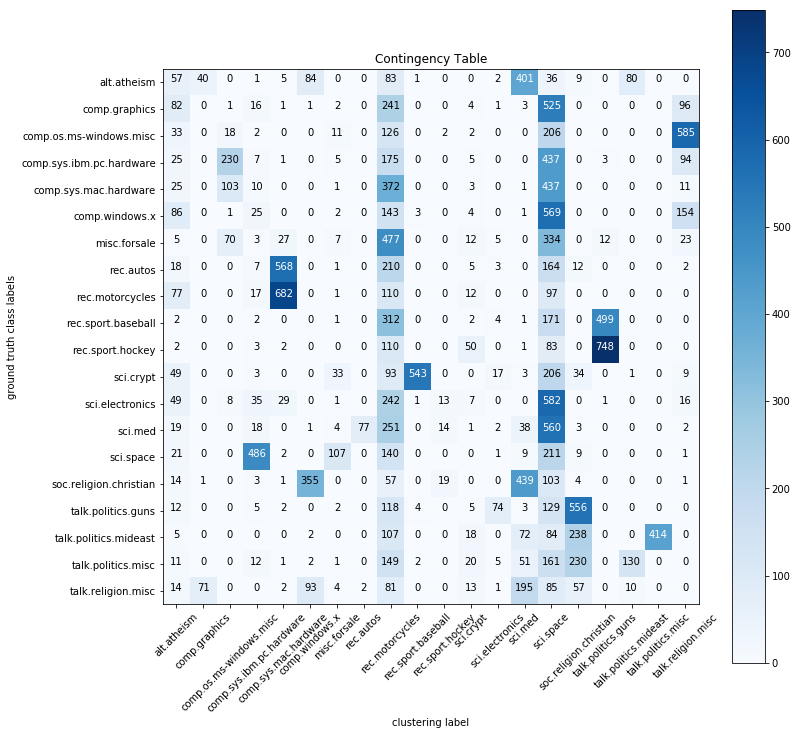

In [29]:
"""
QUESTION 11
"""
print("----------- QUESTION 11 Modified Contingency Table-----------")

# report contingency table
print("the contingency table is \n", metrics.cluster.contingency_matrix(y,y_pred))

# plot the contingency table
classes = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

plt.figure()
plt.figure(figsize=(12,12))
plot_contingency_table(metrics.cluster.contingency_matrix(y,y_pred), classes, normalize=False)
plt.show()

In [30]:
"""
QUESTION 12
"""
print("----------- QUESTION 12 -----------")

n = [1,2,3,5,10,20,50,100,300]

# store combined scores in a 2D matrix, rows:n[i], cols: 10 combs
w, h = 2, len(n)
combined_scores = [[0 for i in range(w)] for j in range(h)]

def compute_scores(y, y_pred):
    homogeneity = metrics.homogeneity_score(y,y_pred)
    completeness = metrics.completeness_score(y,y_pred)
    V_measure = metrics.v_measure_score(y,y_pred)
    AR_index = metrics.adjusted_rand_score(y,y_pred)
    AMI_score = metrics.adjusted_mutual_info_score(y,y_pred)
    avg = (homogeneity+completeness+V_measure+AR_index+AMI_score)/5
    return avg

# First we test for the best r for SVD and NMF, respectively, without any transformation
for i in range(9):
    print("n = %d: " % n[i])
    print()
    
    svd =  TruncatedSVD(n_components=n[i], random_state=42)
    X_svd = svd.fit_transform(X_tfidf)
    nmf =  NMF(n_components=n[i], random_state=42)
    X_nmf = nmf.fit_transform(X_tfidf)

    #SVD
    y_pred_svd = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd)
   
    # NMF
    y_pred_nmf = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf)

    # Print scores
    print("SVD")
    print_score(dataset.target, y_pred_svd)
    
    print("NMF")
    print_score(dataset.target, y_pred_nmf)

    print("==============================================")
    
    # Compute a combined score with equal weights
    combined_scores[i][0] = compute_scores(dataset.target, y_pred_svd)    
    combined_scores[i][1] = compute_scores(dataset.target, y_pred_nmf)
    
# Plot combined scores
display(combined_scores)
x = np.arange(2)
ys = combined_scores



----------- QUESTION 12 -----------
n = 1: 

SVD
Homogeneity:  0.027933889391718526
Completeness:  0.030859133190325978
V-measure:  0.029323738614048973
adjusted Rand Index:  0.005984469472763734
adjusted mutual information score:  0.024764638893115937
NMF
Homogeneity:  0.028054023784638844
Completeness:  0.03106939875887342
V-measure:  0.029484817159033307
adjusted Rand Index:  0.006012165444850904
adjusted mutual information score:  0.024883653394287858


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


n = 2: 

SVD
Homogeneity:  0.2100642007801362
Completeness:  0.22459568307413263
V-measure:  0.21708703478812233
adjusted Rand Index:  0.06435040831036436
adjusted mutual information score:  0.2075031661851036
NMF
Homogeneity:  0.16793918388907642
Completeness:  0.18114488698285916
V-measure:  0.17429225234823542
adjusted Rand Index:  0.051042421873707056
adjusted mutual information score:  0.16521517851431072


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


n = 3: 

SVD
Homogeneity:  0.23177057600242082
Completeness:  0.2418750473812427
V-measure:  0.2367150303287147
adjusted Rand Index:  0.0779920230862099
adjusted mutual information score:  0.22928717125172984
NMF
Homogeneity:  0.19206281900180378
Completeness:  0.2095632163321506
V-measure:  0.20043173772024098
adjusted Rand Index:  0.05752037782554737
adjusted mutual information score:  0.18944185132161065


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


n = 5: 

SVD
Homogeneity:  0.3126154556011439
Completeness:  0.3320114240361163
V-measure:  0.3220216403270062
adjusted Rand Index:  0.12293958269783609
adjusted mutual information score:  0.3103919272950767
NMF
Homogeneity:  0.29221319361754877
Completeness:  0.3098441154775363
V-measure:  0.3007704985539709
adjusted Rand Index:  0.10483733289997256
adjusted mutual information score:  0.28992199862033796


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


n = 10: 

SVD
Homogeneity:  0.3383954355663722
Completeness:  0.3791402234281587
V-measure:  0.3576109965809555
adjusted Rand Index:  0.13677381608152034
adjusted mutual information score:  0.3362464082273654
NMF
Homogeneity:  0.3166008781702241
Completeness:  0.35662868700935885
V-measure:  0.33542482780814503
adjusted Rand Index:  0.12413031825117046
adjusted mutual information score:  0.31437955262311035
n = 20: 



C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


SVD
Homogeneity:  0.28792821580529415
Completeness:  0.3833521108686508
V-measure:  0.32885781072865206
adjusted Rand Index:  0.0929468618728233
adjusted mutual information score:  0.2855969410654562
NMF
Homogeneity:  0.28304784267301075
Completeness:  0.3729433611507248
V-measure:  0.32183606486680366
adjusted Rand Index:  0.09403329085665761
adjusted mutual information score:  0.2807002662176026
n = 50: 



C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


SVD
Homogeneity:  0.337349921205238
Completeness:  0.49282858414544073
V-measure:  0.40052996544140773
adjusted Rand Index:  0.09513006394013136
adjusted mutual information score:  0.33517763781494136
NMF
Homogeneity:  0.19067456667733423
Completeness:  0.3699036742106797
V-measure:  0.25163739028024495
adjusted Rand Index:  0.03270226085193137
adjusted mutual information score:  0.1879756754177938
n = 100: 

C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)




SVD
Homogeneity:  0.2757058935951528
Completeness:  0.37724085934887175
V-measure:  0.3185788971564128
adjusted Rand Index:  0.07908366130289018
adjusted mutual information score:  0.27333340731056677
NMF
Homogeneity:  0.09851797604385185
Completeness:  0.25990531173611336
V-measure:  0.14287768762953423
adjusted Rand Index:  0.005521882006374197
adjusted mutual information score:  0.09549729377204559
n = 300: 



C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


SVD
Homogeneity:  0.3012402772300583
Completeness:  0.46635795988432077
V-measure:  0.36603992643892314
adjusted Rand Index:  0.0736211818416129
adjusted mutual information score:  0.29894525811462414
NMF
Homogeneity:  0.09593210290256039
Completeness:  0.2198392656189165
V-measure:  0.1335753976057067
adjusted Rand Index:  0.01035446282897138
adjusted mutual information score:  0.09290092388673316


C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


[[0.02377317391239463, 0.023900811708336866],
 [0.18472009862757183, 0.14792678472163776],
 [0.20352796961006359, 0.1698040004402707],
 [0.2799960059914358, 0.2595174278338733],
 [0.30963337597687446, 0.28943285277240177],
 [0.2757363880681753, 0.2705121651529599],
 [0.33220323450943184, 0.20657871348759685],
 [0.2647885437427789, 0.12046403023758386],
 [0.30124092070190783, 0.11052043056857763]]

NameError: name 'cm' is not defined

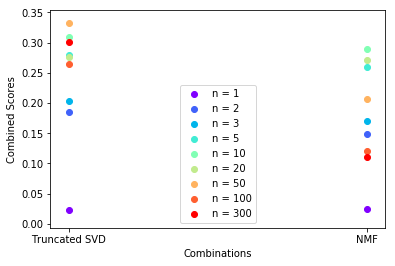

Best r for Truncated SVD = 50: 
Combination 1: SVD
Homogeneity:  0.43959548121696423
Completeness:  0.3883893729689692
V-measure:  0.4124090252296057
adjusted Rand Index:  0.24104996977520018
adjusted mutual information score:  0.38614866317281343
Combination 2: SVD + Unit Variance
Homogeneity:  0.2939619979743636
Completeness:  0.29582872117232556
V-measure:  0.2948924054275903
adjusted Rand Index:  0.10284229324957922
adjusted mutual information score:  0.29102003000335935
Combination 3: SVD + Log Trans
Homogeneity:  0.48853473459986907
Completeness:  0.3589610056479488
V-measure:  0.41384259837021475
adjusted Rand Index:  0.27958942081599675
adjusted mutual information score:  0.35703153238167584
Combination 4: SVD + Unit Variance + Log Trans
Homogeneity:  0.4568372978247501
Completeness:  0.3287353801284133
V-measure:  0.382341664805736
adjusted Rand Index:  0.23851461259554435
adjusted mutual information score:  0.32675963439723194
Combination 5: SVD + Log Trans + Unit Variance
Ho

C:\Users\andyx\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.45311333362109985
Completeness:  0.3181184180847859
V-measure:  0.37380125127327035
adjusted Rand Index:  0.18930725389298098
adjusted mutual information score:  0.3161618823249004
Combination 10: NMF + Log Trans + Unit Variance
Homogeneity:  0.46134956448979353
Completeness:  0.32667096834381487
V-measure:  0.382501477302751
adjusted Rand Index:  0.20521019208778357
adjusted mutual information score:  0.3247219224494371


[0.37351850247271057,
 0.2557090895654436,
 0.379591858363141,
 0.34663771795033516,
 0.34777249300659474,
 0.26924246997717516,
 0.2646425549151886,
 0.3472682639309582,
 0.3301004278394075,
 0.340090824934716]

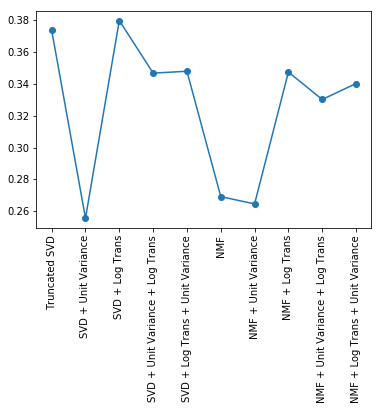

In [32]:
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for k, c in zip(ys, colors):
    plt.scatter(x, k, color=c, marker="o")

plt.legend(['n = 1', 'n = 2', 'n = 3', 'n = 5', 'n = 10', 'n = 20', 'n = 50', 'n = 100', 'n = 300'], loc=0)
plt.xticks(np.arange(2), ['Truncated SVD', 'NMF'])
plt.xlabel('Combinations')
plt.ylabel('Combined Scores')
plt.show()

# Next, we test for different transformation combinations for best_r_SVD and best_r_NMF

combined_scores = [0 for j in range(10)]

# SVD transformation
best_r_SVD = 50
best_r_NMF = 10

svd =  TruncatedSVD(n_components = best_r_SVD, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
nmf =  NMF(n_components = best_r_NMF, random_state=42)
X_nmf = nmf.fit_transform(X_tfidf)
X_svd_scaled = preprocessing.scale(X_svd)
X_nmf_scaled = preprocessing.scale(X_nmf)
X_svd_log = log_trans(X_svd)
X_nmf_log = log_trans(X_nmf)

# comb 1, SVD
y_pred_svd_1 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd)
# comb 2, SVD + unit var
y_pred_svd_2 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd_scaled)
# comb 3, SVD + log
y_pred_svd_3 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_svd_log)
# comb 4, SVD + unit var + log
y_pred_svd_4 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_svd_scaled))
# comb 5, SVD + log + unit var
y_pred_svd_5 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(preprocessing.scale(X_svd_log))

# comb 6, NMF
y_pred_nmf_1 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf)
# comb 7, NMF + unit var
y_pred_nmf_2 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf_scaled)
# comb 8, NMF + log
y_pred_nmf_3 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(X_nmf_log)
# comb 9, NMF + unit var + log
y_pred_nmf_4 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(log_trans(X_nmf_scaled))
# comb 10, NMF + log + unit var
y_pred_nmf_5 = KMeans(n_clusters=20, n_init=50, max_iter=1500, random_state=0).fit_predict(preprocessing.scale(X_nmf_log))

# Print scores
print("Best r for Truncated SVD = %d: " % best_r_SVD)
print("Combination 1: SVD")
print_score(dataset.target, y_pred_svd_1)
print("Combination 2: SVD + Unit Variance")
print_score(dataset.target, y_pred_svd_2)
print("Combination 3: SVD + Log Trans")
print_score(dataset.target, y_pred_svd_3)
print("Combination 4: SVD + Unit Variance + Log Trans")
print_score(dataset.target, y_pred_svd_4)
print("Combination 5: SVD + Log Trans + Unit Variance")
print_score(dataset.target, y_pred_svd_5)
print()

print("Best r for Truncated NMF = %d: " % best_r_NMF)
print("Combination 5: NMF")
print_score(dataset.target, y_pred_nmf_1)
print("Combination 6:  NMF + Unit Variance")
print_score(dataset.target, y_pred_nmf_2)
print("Combination 7: NMF + Log Trans")
print_score(dataset.target, y_pred_nmf_3)
print("Combination 8: NMF + Unit Variance + Log Trans")
print_score(dataset.target, y_pred_nmf_4)
print("Combination 10: NMF + Log Trans + Unit Variance")
print_score(dataset.target, y_pred_nmf_5)

# Compute a combined score with equal weights
combined_scores[0] = compute_scores(dataset.target, y_pred_svd_1)
combined_scores[1] = compute_scores(dataset.target, y_pred_svd_2)
combined_scores[2] = compute_scores(dataset.target, y_pred_svd_3)
combined_scores[3] = compute_scores(dataset.target, y_pred_svd_4)
combined_scores[4] = compute_scores(dataset.target, y_pred_svd_5)

combined_scores[5] = compute_scores(dataset.target, y_pred_nmf_1)
combined_scores[6] = compute_scores(dataset.target, y_pred_nmf_2)
combined_scores[7] = compute_scores(dataset.target, y_pred_nmf_3)
combined_scores[8] = compute_scores(dataset.target, y_pred_nmf_4)
combined_scores[9] = compute_scores(dataset.target, y_pred_nmf_5)
    
# Plot combined scores
display(combined_scores)
x = np.arange(10)
plt.plot(x, combined_scores, marker="o")
plt.xticks(np.arange(10), ['Truncated SVD', 'SVD + Unit Variance', 'SVD + Log Trans', 'SVD + Unit Variance + Log Trans', 'SVD + Log Trans + Unit Variance', 'NMF','NMF + Unit Variance', 'NMF + Log Trans', 'NMF + Unit Variance + Log Trans', 'NMF + Log Trans + Unit Variance'], rotation = 90)
plt.show()